In [12]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("Hearing scheduled for 5/6/2021.")
print([(w.text, w.pos_) for w in doc])


[('Hearing', 'AUX'), ('scheduled', 'VERB'), ('for', 'ADP'), ('5/6/2021', 'NUM'), ('.', 'PUNCT')]


In [21]:
import nltk

nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [14]:
import nltk
import spacy
import numpy as np
import pandas as pd

# following line is optional for custom vocabulary installation
# you can use nlp = spacy.load('en')
nlp = spacy.load('en_core_web_sm')

In [35]:
sentence = "Hearing is scheduled for 5/6/2021."
# sentence = "The brown fox is quick and he is jumping over the lazy dog"
sentence

'Hearing is scheduled for 5/6/2021.'

In [36]:
words = sentence.split()
np.random.shuffle(words)
print(words)

['for', 'Hearing', 'is', 'scheduled', '5/6/2021.']


In [37]:
pos_tags = nltk.pos_tag(sentence.split())
pd.DataFrame(pos_tags).T

,0,1,2,3,4
0,Hearing,is,scheduled,for,5/6/2021.
1,NNP,VBZ,VBN,IN,CD


In [38]:
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in nlp(sentence)]
pd.DataFrame(spacy_pos_tagged).T

,0,1,2,3,4,5
0,Hearing,is,scheduled,for,5/6/2021,.
1,NN,VBZ,VBN,IN,CD,.
2,NOUN,AUX,VERB,ADP,NUM,PUNCT


In [39]:
grammar = '''
            NP: {<DT>?<JJ>?<NN.*>}  
            ADJP: {<JJ>}
            ADVP: {<RB.*>}
            PP: {<IN>}      
            VP: {<MD>?<VB.*>+}
          '''

pos_tagged_sent = nltk.pos_tag(sentence.split())
rp = nltk.RegexpParser(grammar)
shallow_parsed_sent = rp.parse(pos_tagged_sent)
print(shallow_parsed_sent)

(S
  (NP Hearing/NNP)
  (VP is/VBZ scheduled/VBN)
  (PP for/IN)
  5/6/2021./CD)


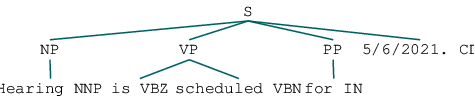

In [40]:
# visualize shallow parse tree
shallow_parsed_sent

In [42]:
import stanza
>>> stanza.download('en')       # This downloads the English models for the neural pipeline
>>> snlp = stanza.Pipeline('en') # This sets up a default neural pipeline in English
>>> doc = snlp(sentence)
>>> doc.sentences[0].print_dependencies()


2021-02-07 10:03:47 INFO: Downloading default packages for language: en (English)...
2021-02-07 10:04:35 INFO: Finished downloading models and saved to /Users/michal/stanza_resources.
2021-02-07 10:04:35 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| sentiment | sstplus   |
| ner       | ontonotes |

2021-02-07 10:04:35 INFO: Use device: cpu
2021-02-07 10:04:35 INFO: Loading: tokenize
2021-02-07 10:04:35 INFO: Loading: pos
2021-02-07 10:04:35 INFO: Loading: lemma
2021-02-07 10:04:35 INFO: Loading: depparse
2021-02-07 10:04:36 INFO: Loading: sentiment
2021-02-07 10:04:36 INFO: Loading: ner
2021-02-07 10:04:37 INFO: Done loading processors!


('Hearing', 3, 'nsubj:pass')
('is', 3, 'aux:pass')
('scheduled', 0, 'root')
('for', 5, 'case')
('5/6/2021.', 3, 'obl')


In [43]:
from nltk.parse.stanford import StanfordParser

scp = StanfordParser(path_to_jar='/Users/michal/Documents/GitHub/stanford-corenlp-4.2.0/stanford-corenlp-4.2.0.jar',
                   path_to_models_jar='/Users/michal/Documents/GitHub/stanford-corenlp-4.2.0/stanford-corenlp-4.2.0-models-english.jar')
                   
result = list(scp.raw_parse(sentence))
print(result[0])

<ipython-input-43-57fcc33fcaa6>:3: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPParser instead.
  scp = StanfordParser(path_to_jar='/Users/michal/Documents/GitHub/stanford-corenlp-4.2.0/stanford-corenlp-4.2.0.jar',


(ROOT
  (S
    (NP (VBG Hearing))
    (VP
      (VBZ is)
      (VP (VBN scheduled) (PP (IN for) (NP (CD 5/6/2021)))))
    (. .)))


In [44]:
from spacy import displacy

displacy.render(nlp(sentence), jupyter=True, 
                options={'distance': 100,
                         'arrow_stroke': 1.5,
                         'arrow_width': 8})

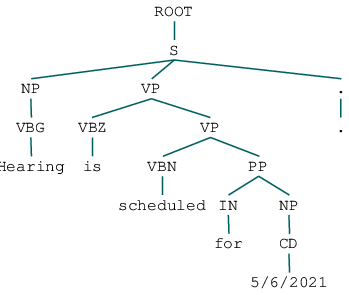

In [45]:
# visualize constituency tree
result[0]

In [46]:
# load the Brown Corpus
from nltk.corpus import brown

# total categories
print('Total Categories:', len(brown.categories()))

Total Categories: 15


In [47]:
# print the categories
print(brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [48]:
# tokenized sentences
brown.sents(categories='mystery')

[['There', 'were', 'thirty-eight', 'patients', 'on', 'the', 'bus', 'the', 'morning', 'I', 'left', 'for', 'Hanover', ',', 'most', 'of', 'them', 'disturbed', 'and', 'hallucinating', '.'], ['An', 'interne', ',', 'a', 'nurse', 'and', 'two', 'attendants', 'were', 'in', 'charge', 'of', 'us', '.'], ...]

In [49]:
# POS tagged sentences
brown.tagged_sents(categories='mystery')

[[('There', 'EX'), ('were', 'BED'), ('thirty-eight', 'CD'), ('patients', 'NNS'), ('on', 'IN'), ('the', 'AT'), ('bus', 'NN'), ('the', 'AT'), ('morning', 'NN'), ('I', 'PPSS'), ('left', 'VBD'), ('for', 'IN'), ('Hanover', 'NP'), (',', ','), ('most', 'AP'), ('of', 'IN'), ('them', 'PPO'), ('disturbed', 'VBN'), ('and', 'CC'), ('hallucinating', 'VBG'), ('.', '.')], [('An', 'AT'), ('interne', 'NN'), (',', ','), ('a', 'AT'), ('nurse', 'NN'), ('and', 'CC'), ('two', 'CD'), ('attendants', 'NNS'), ('were', 'BED'), ('in', 'IN'), ('charge', 'NN'), ('of', 'IN'), ('us', 'PPO'), ('.', '.')], ...]

In [50]:
# get sentences in natural form
sentences = brown.sents(categories='mystery')
sentences = [' '.join(sentence_token) for sentence_token in sentences]
sentences[0:5] # viewing the first 5 sentences

['There were thirty-eight patients on the bus the morning I left for Hanover , most of them disturbed and hallucinating .',
 'An interne , a nurse and two attendants were in charge of us .',
 "I felt lonely and depressed as I stared out the bus window at Chicago's grim , dirty West Side .",
 'It seemed incredible , as I listened to the monotonous drone of voices and smelled the fetid odors coming from the patients , that technically I was a ward of the state of Illinois , going to a hospital for the mentally ill .',
 'I suddenly thought of Mary Jane Brennan , the way her pretty eyes could flash with anger , her quiet competence , the gentleness and sweetness that lay just beneath the surface of her defenses .']

In [51]:
# get tagged words
tagged_words = brown.tagged_words(categories='mystery')

# get nouns from tagged words
nouns = [(word, tag) for word, tag in tagged_words if any(noun_tag in tag for noun_tag in ['NP', 'NN'])]

nouns[0:10] # view the first 10 nouns

[('patients', 'NNS'),
 ('bus', 'NN'),
 ('morning', 'NN'),
 ('Hanover', 'NP'),
 ('interne', 'NN'),
 ('nurse', 'NN'),
 ('attendants', 'NNS'),
 ('charge', 'NN'),
 ('bus', 'NN'),
 ('window', 'NN')]

In [52]:
# build frequency distribution for nouns
nouns_freq = nltk.FreqDist([word for word, tag in nouns])

# view top 10 occuring nouns
nouns_freq.most_common(10)

[('man', 106),
 ('time', 82),
 ('door', 80),
 ('car', 69),
 ('room', 65),
 ('Mr.', 63),
 ('way', 61),
 ('office', 50),
 ('eyes', 48),
 ('hand', 46)]

In [53]:
# load the Reuters Corpus
from nltk.corpus import reuters

# total categories
print('Total Categories:', len(reuters.categories()))

Total Categories: 90


In [54]:
# print the categories
print(reuters.categories())

['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel', 'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'sun-meal', 'sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']


In [55]:
# get sentences in housing and income categories
sentences = reuters.sents(categories=['housing', 'income'])
sentences = [' '.join(sentence_tokens) for sentence_tokens in sentences]
sentences[0:5]  # view the first 5 sentences

["YUGOSLAV ECONOMY WORSENED IN 1986 , BANK DATA SHOWS National Bank economic data for 1986 shows that Yugoslavia ' s trade deficit grew , the inflation rate rose , wages were sharply higher , the money supply expanded and the value of the dinar fell .",
 'The trade deficit for 1986 was 2 . 012 billion dlrs , 25 . 7 pct higher than in 1985 .',
 'The trend continued in the first three months of this year as exports dropped by 17 . 8 pct , in hard currency terms , to 2 . 124 billion dlrs .',
 'Yugoslavia this year started quoting trade figures in dinars based on current exchange rates , instead of dollars based on a fixed exchange rate of 264 . 53 dinars per dollar .',
 "Yugoslavia ' s balance of payments surplus with the convertible currency area fell to 245 mln dlrs in 1986 from 344 mln in 1985 ."]

In [56]:
# fileid based access
print(reuters.fileids(categories=['housing', 'income']))

['test/16118', 'test/18534', 'test/18540', 'test/18664', 'test/18665', 'test/18672', 'test/18911', 'test/19875', 'test/20106', 'test/20116', 'training/1035', 'training/1036', 'training/10602', 'training/10604', 'training/11170', 'training/11665', 'training/2618', 'training/29', 'training/3105', 'training/3708', 'training/3720', 'training/3723', 'training/3898', 'training/5883', 'training/5886', 'training/6000', 'training/6067', 'training/6197', 'training/7005', 'training/7006', 'training/7015', 'training/7036', 'training/7098', 'training/7099', 'training/9615']


In [57]:
print(reuters.sents(fileids=[u'test/16118', u'test/18534']))

[['YUGOSLAV', 'ECONOMY', 'WORSENED', 'IN', '1986', ',', 'BANK', 'DATA', 'SHOWS', 'National', 'Bank', 'economic', 'data', 'for', '1986', 'shows', 'that', 'Yugoslavia', "'", 's', 'trade', 'deficit', 'grew', ',', 'the', 'inflation', 'rate', 'rose', ',', 'wages', 'were', 'sharply', 'higher', ',', 'the', 'money', 'supply', 'expanded', 'and', 'the', 'value', 'of', 'the', 'dinar', 'fell', '.'], ['The', 'trade', 'deficit', 'for', '1986', 'was', '2', '.', '012', 'billion', 'dlrs', ',', '25', '.', '7', 'pct', 'higher', 'than', 'in', '1985', '.'], ...]


In [58]:
# load the Wordnet Corpus
from nltk.corpus import wordnet as wn

word = 'hike' # taking hike as our word of interest
# get word synsets
word_synsets = wn.synsets(word)
word_synsets

[Synset('hike.n.01'),
 Synset('rise.n.09'),
 Synset('raise.n.01'),
 Synset('hike.v.01'),
 Synset('hike.v.02')]

In [59]:
# get details for each synonym in synset
for synset in word_synsets:
    print(('Synset Name: {name}\n'
           'POS Tag: {tag}\n'
           'Definition: {defn}\n'
           'Examples: {ex}\n').format(name=synset.name(),
                                      tag=synset.pos(),
                                      defn=synset.definition(),
                                      ex=synset.examples()))
          

Synset Name: hike.n.01
POS Tag: n
Definition: a long walk usually for exercise or pleasure
Examples: ['she enjoys a hike in her spare time']

Synset Name: rise.n.09
POS Tag: n
Definition: an increase in cost
Examples: ['they asked for a 10% rise in rates']

Synset Name: raise.n.01
POS Tag: n
Definition: the amount a salary is increased
Examples: ['he got a 3% raise', 'he got a wage hike']

Synset Name: hike.v.01
POS Tag: v
Definition: increase
Examples: ['The landlord hiked up the rents']

Synset Name: hike.v.02
POS Tag: v
Definition: walk a long way, as for pleasure or physical exercise
Examples: ['We were hiking in Colorado', 'hike the Rockies']

